<a href="https://colab.research.google.com/github/jane95924/WEEK_14_IP/blob/master/PART_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSOCIATIVE ANALYSIS.

In [2]:
# We first we install the required arules library 
install.packages("arules")
# Loading the arules library
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [3]:
path <-"http://bit.ly/SupermarketDatasetII"
#Loading our dataset
data<-read.transactions(path, sep = ",")
data

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [4]:
#checking the structure
str(data)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:29358] 0 1 3 32 38 47 52 53 59 64 ...
  .. .. ..@ p       : int [1:7502] 0 20 23 24 26 31 32 34 37 40 ...
  .. .. ..@ Dim     : int [1:2] 119 7501
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	119 obs. of  1 variable:
  .. ..$ labels: chr [1:119] "almonds" "antioxydant juice" "asparagus" "avocado" ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [5]:
#checking the class
class(data)

[1] "transactions"
attr(,"package")
[1] "arules"

In [6]:
#previewing our transactions.
inspect(data)

       items                 
[1]    {almonds,             
        antioxydant juice,   
        avocado,             
        cottage cheese,      
        energy drink,        
        frozen smoothie,     
        green grapes,        
        green tea,           
        honey,               
        low fat yogurt,      
        mineral water,       
        olive oil,           
        salad,               
        salmon,              
        shrimp,              
        spinach,             
        tomato juice,        
        vegetables mix,      
        whole weat flour,    
        yams}                
[2]    {burgers,             
        eggs,                
        meatballs}           
[3]    {chutney}             
[4]    {avocado,             
        turkey}              
[5]    {energy bar,          
        green tea,           
        milk,                
        mineral water,       
        whole wheat rice}    
[6]    {low fat yogurt}      
[7]    {fr

In [9]:
#we want to preview items that make up our dataset.
items<-as.data.frame(itemLabels(data))
colnames(items) <- "Item"
head(items, 10)

,Item
,<fct>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [10]:
#let us look at the summary of our data
summary(data)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [11]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing 
# and the percentage.
itemFrequency(data[, 8:10],type = "absolute")
round(itemFrequency(data[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
        107          69          86

black tea blueberries  body spray 
       1.43        0.92        1.15

Black tea has the highest frequency.

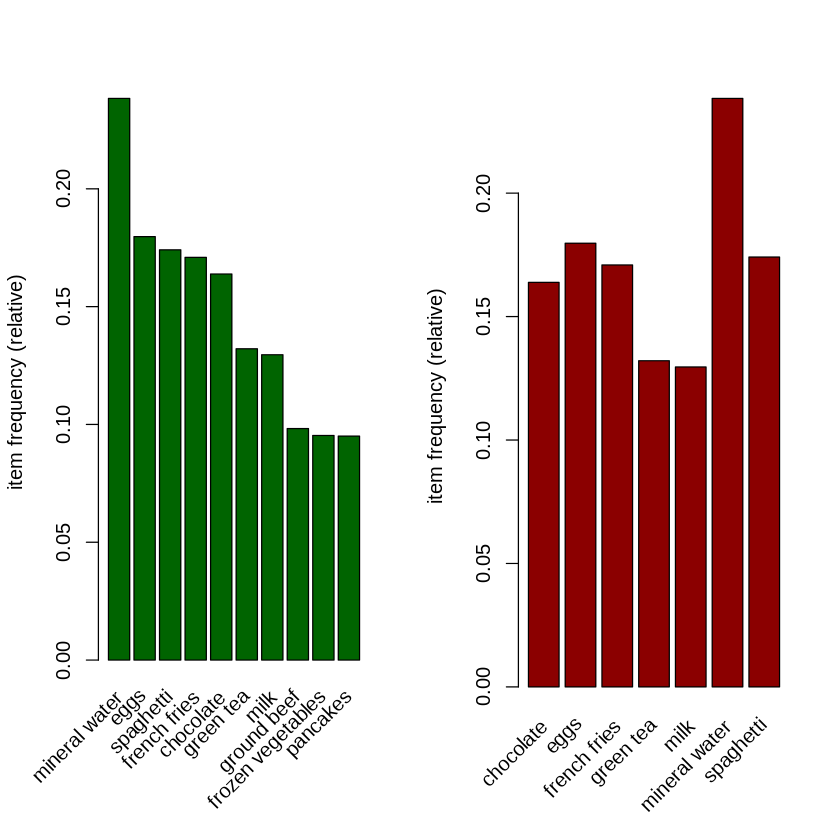

In [12]:
#producing a chart of frequencies'
# top 10 items that are sold most.
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(data, topN = 10,col="darkgreen")
itemFrequencyPlot(data, support = 0.1,col="darkred")

Mineral water has the highest frequency, followed by eggs then spaghetti.

In [13]:
# Building a model based on association rules 
# using the apriori function 
# We use Min Support as 0.001 and confidence as 0.8
rules <- apriori (data, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

We have a set of 74 rules.

In [14]:
# We use measures of significance and interest on the rules, 
# determining which ones are interesting and which to discard.
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (data,parameter = list(supp = 0.002, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (data, parameter = list(supp = 0.001, conf = 0.6)) 

rules2

rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbos

set of 2 rules 

set of 545 rules 

From above we can see that we get a set of 545 rules.

In [15]:
#check the summary of the rules.
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
 data ntransactions support confidence
 data          7501   0.001        0.8

we have a total of 7501 transactions, a support of 0.01 and confidence of 0.8

In [16]:
# Observing rules built in our model i.e. first 10 model rules

inspect(rules[1:10])


     lhs                             rhs             support     confidence
[1]  {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3]  {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4]  {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5]  {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
[6]  {milk,pasta}                 => {shrimp}        0.001599787 0.8571429 
[7]  {cooking oil,fromage blanc}  => {mineral water} 0.001199840 0.8181818 
[8]  {black tea,salmon}           => {mineral water} 0.001066524 0.8000000 
[9]  {black tea,frozen smoothie}  => {milk}          0.001199840 0.8181818 
[10] {red wine,tomato sauce}      => {chocolate}     0.001066524 0.8000000 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  4.666587 13   
[3]  0.001466471  3.432428  9   
[4]  0.001866418  3.595877 12   

From our observation above, when a customer purchases bacon and pancakes, a chance they will get spaghetti is 81%. when a customer purchases frozen smoothie and spinach, the chance they will get mineral water is 89%.

In [18]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:4])


    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
    confidence coverage    lift      count
[1] 1          0.001066524 12.606723 8    
[2] 1          0.001199840  4.195190 9    
[3] 1          0.001066524  7.717078 8    
[4] 1          0.001199840  4.195190 9    


The rules above have a confidence of 100%.

In [20]:
# This would tell us the items that the customers bought before purchasing milk
# let us subset a rule concerning milk
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:2])

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
    coverage    lift     count
[1] 0.001066524 7.717078 8    
[2] 0.001199840 6.859625 8    


we can see that, when a customer purchasea cake,meatballs and mineral water, there is 100% chance they will buy milk. When a customer purchases escalope, hot dogs and mineral water, there is 89% chance they will buy milk.

In [21]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[15:19])

    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    


When a customer purchase chocolate, hot dog and milk, there is 80% chance they will buy mineral water.